# 시즌이 1개 뿐인 드라마와 시즌 2개 이상 있는 드라마 비교

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import plotly.graph_objects as go
from matplotlib import font_manager,rc

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 폰트 이름 확인
from matplotlib import font_manager
f_path = 'c:/Windows/Fonts/malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Malgun Gothic'

In [4]:
# 한국어 설정
from matplotlib import font_manager, rc
rc("font",family ='Malgun Gothic')
%matplotlib inline

In [5]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_5.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 905
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        906 non-null    object 
 1   english_title       906 non-null    object 
 2   year                906 non-null    int64  
 3   total_season_num    906 non-null    int64  
 4   runtime             906 non-null    int64  
 5   genre               906 non-null    object 
 6   age_rating          906 non-null    object 
 7   production_country  906 non-null    object 
 8   total_count         906 non-null    int64  
 9   total_rate          906 non-null    float64
 10  watchlist           906 non-null    int64  
 11  popularity          906 non-null    int64  
 12  user_review         906 non-null    int64  
 13  critic_review       906 non-null    int64  
 14  production          822 non-null    object 
 15  distributor         898 non-null    object 
 16  season_1     

In [6]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [7]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [8]:
# 이 컬럼은 여기서 사용하지 않을 예정이라 잠시 뺌
del df['season_3']
del df['season_4']
del df['season_5']
del df['season_6']
del df['season_7']
del df['season_8']
del df['season_9']
del df['season_10']
del df['season_11']
del df['season_12']
del df['season_13']
del df['season_14']
del df['season_15']
del df['season_16']
del df['season_17']

In [9]:
del df['imdb_title']
del df['imdb_url']

In [10]:
df['age_rating'].unique()

array([19, 15, 12, 'ALL', 7], dtype=object)

In [11]:
# 'genre' 컬럼에 대해서만 문자열로 변환
df['genre'] = df['genre'].astype(str)

# '드라마' 항목 제거
df['genre'] = df['genre'].apply(lambda x: ', '.join([genre for genre in x.split(', ') if genre != '드라마']))

# season1의 관심 유지도
- (마지막 episode 평점 매긴 사람수 / 처음 episode 평점 매긴 사람수) *100

In [12]:
# 시청 지속율(관심유지도) 계산 함수
def calculate_retention_rate(season_data):
    episode_views = [ep[1] for ep in season_data.values() if isinstance(ep, (list, tuple))]
    if len(episode_views) > 1:
        initial_viewers = episode_views[0]
        final_viewers = episode_views[-1]
        retention_rate = (final_viewers / initial_viewers) * 100
    else:
        retention_rate = 100  # If there's only one episode, retention is 100%
    return retention_rate

# 시즌 1의 시청 지속율 계산
df['s1_retention_rate'] = df['season_1'].apply(calculate_retention_rate)

In [13]:
df_1 = df[df['total_season_num']==1]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 905
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        639 non-null    object 
 1   english_title       639 non-null    object 
 2   year                639 non-null    int64  
 3   total_season_num    639 non-null    int64  
 4   runtime             639 non-null    int64  
 5   genre               639 non-null    object 
 6   age_rating          639 non-null    object 
 7   production_country  639 non-null    object 
 8   total_count         639 non-null    int64  
 9   total_rate          639 non-null    float64
 10  watchlist           639 non-null    int64  
 11  popularity          639 non-null    int64  
 12  user_review         639 non-null    int64  
 13  critic_review       639 non-null    int64  
 14  production          563 non-null    object 
 15  distributor         633 non-null    object 
 16  season_1     

In [14]:
df_2 = df[df['total_season_num']>=2]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 3 to 885
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        267 non-null    object 
 1   english_title       267 non-null    object 
 2   year                267 non-null    int64  
 3   total_season_num    267 non-null    int64  
 4   runtime             267 non-null    int64  
 5   genre               267 non-null    object 
 6   age_rating          267 non-null    object 
 7   production_country  267 non-null    object 
 8   total_count         267 non-null    int64  
 9   total_rate          267 non-null    float64
 10  watchlist           267 non-null    int64  
 11  popularity          267 non-null    int64  
 12  user_review         267 non-null    int64  
 13  critic_review       267 non-null    int64  
 14  production          259 non-null    object 
 15  distributor         265 non-null    object 
 16  season_1     

In [15]:
# Box Plot 시각화
fig = go.Figure()

# df_1 Box Plot
fig.add_trace(go.Box(
    y=df_1['s1_retention_rate'],
    name='Season 1 Only',
    boxpoints='all',  # 'outliers', 'suspectedoutliers', or False
    jitter=0.3,       # Spread the points horizontally
    pointpos=-1.8     # Offset points to the left of the box
))

# df_2 Box Plot
fig.add_trace(go.Box(
    y=df_2['s1_retention_rate'],
    name='Season 2+',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# df Box Plot (Combined DataFrame)
fig.add_trace(go.Box(
    y=df['s1_retention_rate'],
    name='Combined',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# 레이아웃 설정
fig.update_layout(
    title='Retention Rate Comparison for Different Drama Types',
    xaxis_title='Drama Type',
    yaxis_title='Retention Rate (%)',
    showlegend=False
)

# 그래프 보여주기
fig.show()

In [16]:
top_10_retention_rates = df_2.sort_values(by='s1_retention_rate', ascending=False).head(10)
print(top_10_retention_rates[['korean_title','s1_retention_rate']])

           korean_title  s1_retention_rate
Unnamed: 0                                
59               길모어 걸스         561.224490
223               진실의 늪         214.893617
9                   플래시         135.416667
669              시크릿 위치         127.272727
25               굿 플레이스         126.666667
54                  덱스터         118.181818
369         굿 키즈 온 더 블록         116.743119
351          루머의 루머의 루머         112.658228
180         원 데이 앳 어 타임         106.229508
46                블랙 미러         103.174603


- Season 2+ 이상치는 https://www.imdb.com/title/tt0238784/episodes/?ref_=tt_eps_sm

In [17]:
# total
sum(df['s1_retention_rate'])/len(df['s1_retention_rate'])

74.4590644181756

In [18]:
# season 1 only
sum(df_1['s1_retention_rate'])/len(df_1['s1_retention_rate'])

73.54930899031002

In [19]:
# season 2+
sum(df_2['s1_retention_rate'])/len(df_2['s1_retention_rate'])

76.6363442623933

- 전체 드라마의 관심유지도: 74.45
- 시즌1만 있는 드라마의 관심유지도: 73.54
- 시즌2이상이 있는 드라마의 관심유지도: 76.63

# age_rating(제한 연령)

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_30008\3669168911.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



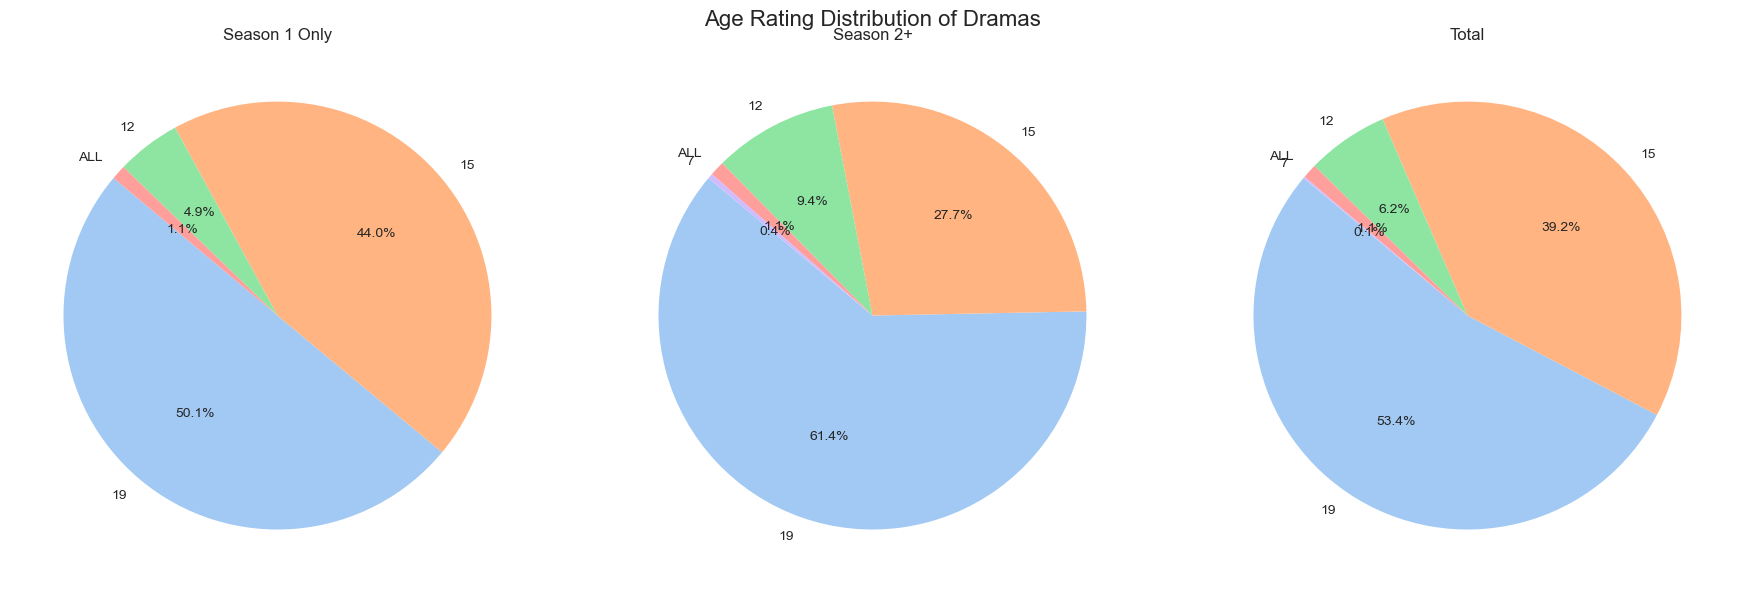

In [20]:
# 각 데이터프레임에서 age_rating 값 별 드라마 수 계산
df_1_counts = df_1['age_rating'].value_counts()
df_2_counts = df_2['age_rating'].value_counts()
df_counts = df['age_rating'].value_counts()

# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# subplot 1
axes[0].pie(df_1_counts, labels=df_1_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0].set_title('Season 1 Only')

# subplot 2
axes[1].pie(df_2_counts, labels=df_2_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title('Season 2+')

# subplot 3
axes[2].pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[2].set_title('Total')

# 전체 그래프의 제목 설정
fig.suptitle('Age Rating Distribution of Dramas', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


- 'Season 2+'이 'Season 1 Only'보다 19세 비중이 더많은것으로 확인됨

# runtime

In [21]:
# runtime Box Plot 시각화
fig = go.Figure()

# runtime Box Plot
fig.add_trace(go.Box(
    y=df_1['runtime'],
    name='S1 Only - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df_2['runtime'],
    name='S2+ - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['runtime'],
    name='Total - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# 레이아웃 설정
fig.update_layout(
    title='Runtime Comparison for Different Drama Types',
    xaxis_title='Drama Type',
    yaxis_title='Runtime (minutes)',
    showlegend=True
)

# runtime 그래프 보여주기
fig.show()

- 시즌2개 이상이 있는 드라마가 runtime이 짧음

# year(개봉연도)

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_30008\3064221348.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



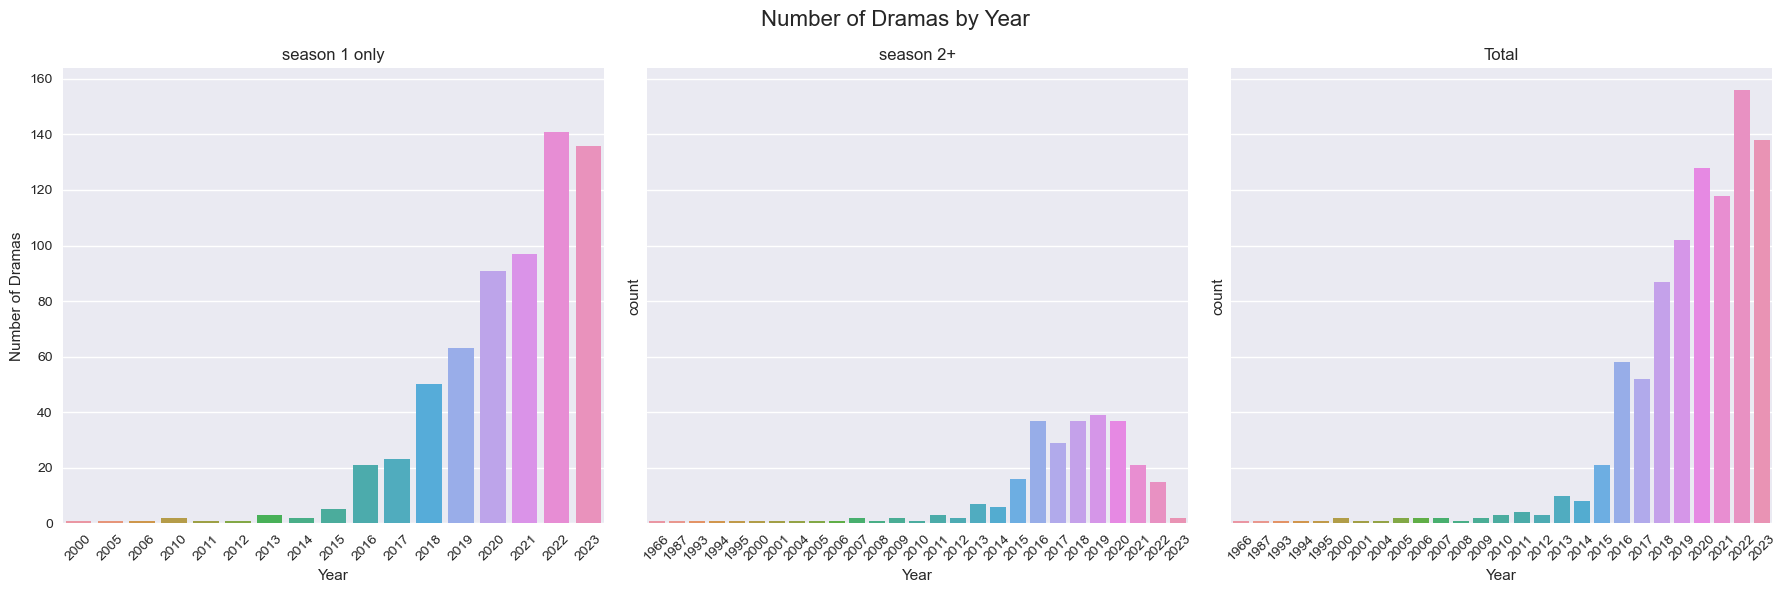

In [22]:
# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# subplot 1: df_1
plt.subplot(1, 3, 1)
sns.countplot(data=df_1, x='year', ax=axes[0])
axes[0].set_title('season 1 only')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Dramas')
axes[0].tick_params(axis='x', rotation=45)

# subplot 2: df_2
plt.subplot(1, 3, 2)
sns.countplot(data=df_2, x='year', ax=axes[1])
axes[1].set_title('season 2+')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=45)

# subplot 3: df
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='year', ax=axes[2])
axes[2].set_title('Total')
axes[2].set_xlabel('Year')
axes[2].tick_params(axis='x', rotation=45)

# 전체 그래프의 제목 설정
fig.suptitle('Number of Dramas by Year', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

- 시즌제 드라마의 인기도가 떨어져 시즌2이상 만드는게 주춤해진 것처럼 보임
- OTT 플랫폼에서 시즌제 드라마가 줄어들고 있다는 명확한 증거는 없지만, 콘텐츠 소비 패턴(시청자들은 한 번에 전체 시즌을 몰아보는 '빙와칭(binge-watching)'을 선호)과 
시청자의 요구(특히 한국 드라마는 전통적으로 시즌제보다는 단일 시즌으로 완결되는 경우가 많음)와 제작비 절감, 리스크 관리 등의 이유로 제작 전략의 변화로 인해 단일 시즌 드라마와 미니시리즈가 증가하고 있는 것으로 보임

## genre

In [23]:
from collections import Counter

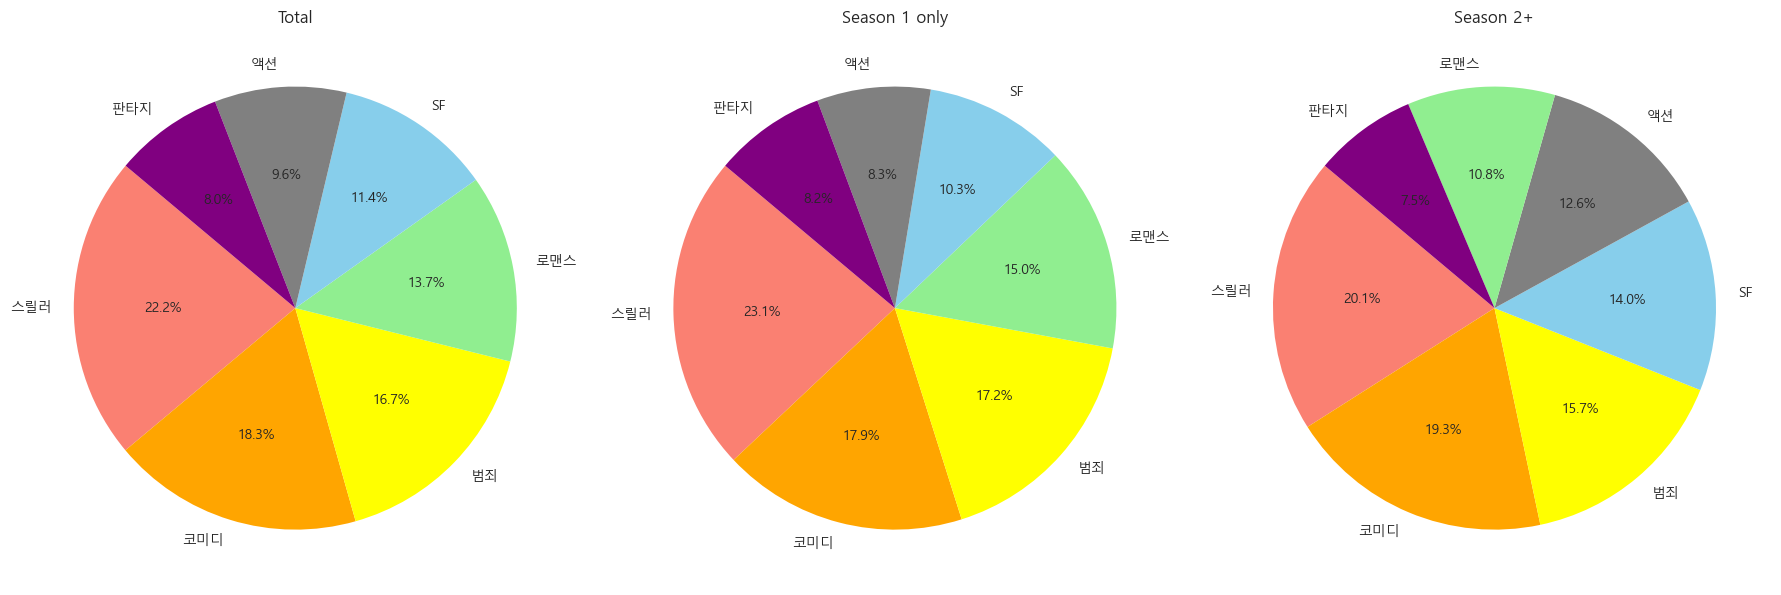

In [24]:
# 장르 분리 및 빈도 계산
genre_counts = {}
for df_temp, label in zip([df, df_1, df_2], ['df', 'df_1', 'df_2']):
    all_genres = df_temp['genre'].str.split(', ').explode()
    genre_counts[label] = Counter(all_genres)

# 상위 7개 장르 선택
top_7_genres = {}
for label in ['df', 'df_1', 'df_2']:
    top_7_genres[label] = genre_counts[label].most_common(7)

# 색상 지정
genre_colors = {
    '스릴러': 'salmon',
    '코미디': 'orange',
    '범죄': 'yellow',
    '로맨스': 'lightgreen',
    'SF': 'skyblue',
    '액션': 'gray',
    '판타지': 'purple'
}

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 서브플롯 생성
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 각 데이터프레임별로 파이 차트 그리기
for i, label in enumerate(['df', 'df_1', 'df_2']):
    top_7_genres_names = [genre for genre, count in top_7_genres[label]]
    top_7_genres_counts = [count for genre, count in top_7_genres[label]]
    
    # 장르별 색상 선택
    colors = [genre_colors.get(genre, 'gray') for genre in top_7_genres_names]
    axs[i].pie(top_7_genres_counts, labels=top_7_genres_names, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_aspect('equal')  # 원형의 모양을 유지하기 위해

axs[0].set_title('Total')
axs[1].set_title('Season 1 only')
axs[2].set_title('Season 2+')

plt.tight_layout()
plt.show()

- total과 시즌1개만 있는 드라마의 상위 7개의 장르 비중은 스릴러 -> 코미디 -> 범죄 -> 로맨스 -> sf -> 액션 -> 판타지 순
- 시즌2개 이상 드라마는 로맨스 장르의 비중이 6위로  낮음

---

In [25]:
# 모든 시즌에 대해서 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=2):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        df[avg_rating_col] = df[season_col].apply(
            lambda x: sum([float(ep[0]) for ep in x.values()]) / len(x) if x else None
        )
        df[avg_views_col] = df[season_col].apply(
            lambda x: sum([int(ep[1]) for ep in x.values()]) / len(x) if x else None
        )

# 모든 시즌에 대해 변환 및 평균 계산
process_seasons(df)

# 변환된 데이터프레임 출력
print(df)

                       korean_title                      english_title  year  \
Unnamed: 0                                                                     
0                            오징어 게임                         Squid Game  2021   
1                          12인의 심판자                         The Twelve  2019   
2                            희생자 게임                  The Victims' Game  2020   
3                스위트 투스: 사슴뿔을 가진 소년                        Sweet Tooth  2021   
4                              스위트홈                         Sweet Home  2020   
...                             ...                                ...   ...   
901                             레일라                              Leila  2019   
902                     100만 엔의 여인들                  Million Yen Women  2017   
903                         킬러 코미디언                            Hasmukh  2020   
904                              달러                             Dollar  2019   
905         엘리트들, 못다 한 이야기: 나디아 구스만  Eli

In [26]:
# df의 각 행에 대해 조건을 체크하고 drama_type 컬럼에 값을 할당
df['drama_type'] = np.where(df['total_season_num'] == 1, 'Season 1 Only', 'Season 2+')

In [27]:
df_int = df[['year','total_season_num','runtime','total_count','total_rate','watchlist','popularity','user_review','critic_review',
            's1_retention_rate','s1_avg_rating','s1_avg_views','s2_avg_rating','s2_avg_views']]

In [28]:
# plt.figure(figsize=(12,6))
# sns.pairplot(data=df_int);

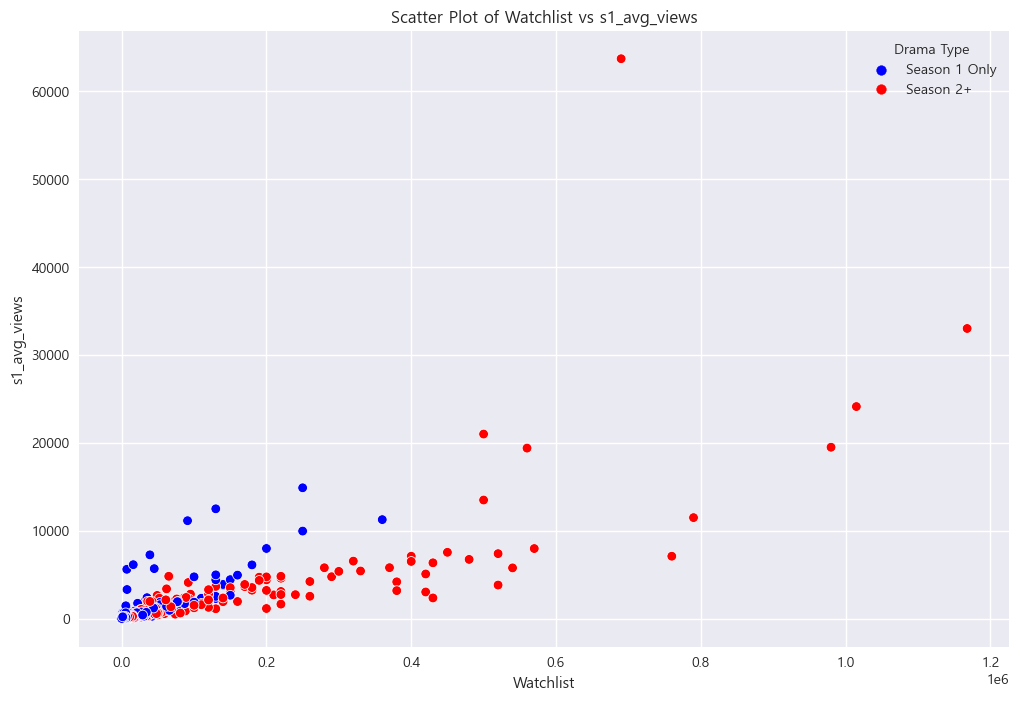

In [29]:
# 그래프 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='watchlist', y='s1_avg_views', hue='drama_type', palette={'Season 1 Only': 'blue', 'Season 2+': 'red'})
plt.title('Scatter Plot of Watchlist vs s1_avg_views')
plt.xlabel('Watchlist')
plt.ylabel('s1_avg_views')
plt.legend(title='Drama Type')
plt.show()

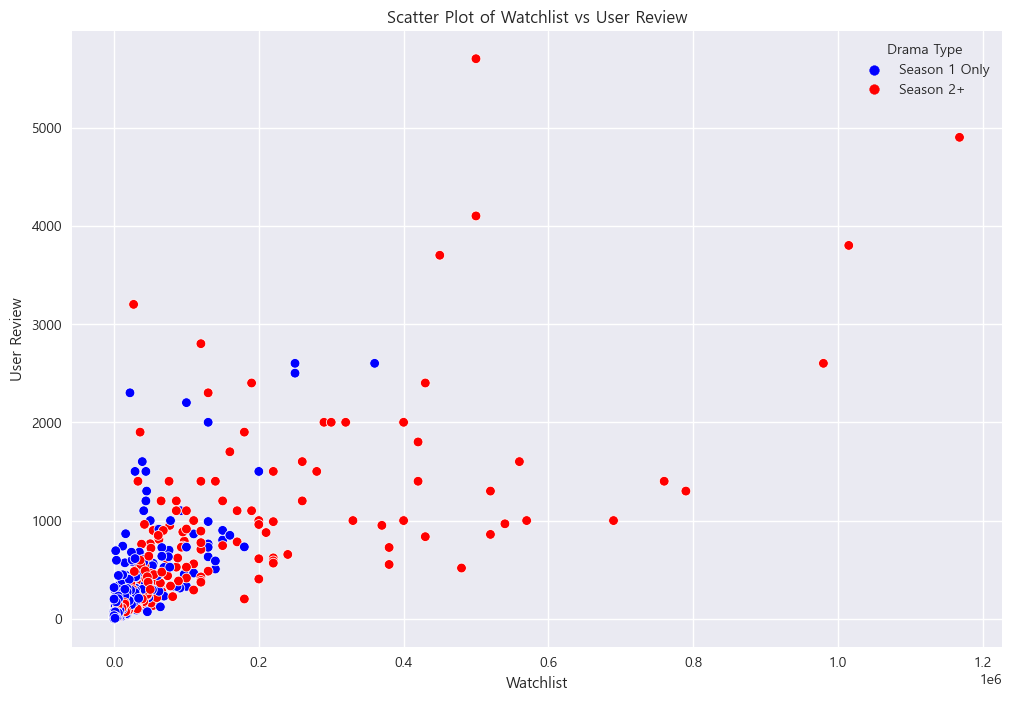

In [30]:
# 그래프 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='watchlist', y='user_review', hue='drama_type', palette={'Season 1 Only': 'blue', 'Season 2+': 'red'})
plt.title('Scatter Plot of Watchlist vs User Review')
plt.xlabel('Watchlist')
plt.ylabel('User Review')
plt.legend(title='Drama Type')
plt.show()

---

In [31]:
# boxplot watchlist userrivew 같은 컬럼 이상치 체크

In [32]:
# 흥행지표 정규 분포에 있는지 체크?

In [33]:
# 흥행지표 개봉연도 시계열분포?